In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
%tensorflow_version 2.x  
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#  LOAD AND SPLIT DATASET
(train_images, _), (test_images, _) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images = np.reshape(train_images, (len(train_images), 32, 32, 3))
test_images = np.reshape(test_images, (len(test_images), 32, 32, 3))



170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
input_img = Input(shape=(32,32,3))

NameError: ignored

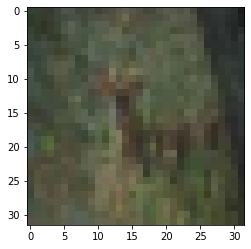

In [ ]:
IMG_INDEX = 10  

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [ ]:
# 16 dimensions of output space
# 3 x 3 height by width of the 2D convolution window
# relu activation Applies the rectified linear unit activation function
# padding same is padding with zeros evenly to the left/right up/down of the input such that the output has the same height/width dimension as the input
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

In [ ]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mae')

In [ ]:
autoencoder.summary()

In [ ]:
autoencoder.fit(train_images, epochs=4, batch_size=128, shuffle=True, validation_data=(test_images))